In [83]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [84]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [85]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [86]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [87]:
# reflect an existing database into a new mode
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [88]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [89]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [90]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [91]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
last_twelveprcp = session.query(measurement.date, measurement.prcp).filter(measurement.date >= "2017-08-23").order_by(measurement.date).all()
print(last_twelveprcp)

[('2017-08-23', 0.0), ('2017-08-23', 0.0), ('2017-08-23', 0.08), ('2017-08-23', 0.45)]


In [57]:
# Starting from the most recent data point in the database. 
last_twelveprcp_first = session.query(measurement.date, measurement.prcp).order_by(measurement.date.desc()).first()
print("Most Recent Data Point:", last_twelveprcp_first)

Most Recent Data Point: ('2017-08-23', 0.0)


In [58]:
# Calculate the date one year from the last date in data set.
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]

last_date

'2017-08-23'

In [75]:
oneyr_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print("1 year ago:", oneyr_ago)

1 year ago: 2016-08-23


In [77]:
# Perform a query to retrieve the data and precipitation scores
last_twelveprcp = session.query(measurement.date, measurement.prcp).filter(measurement.date >= oneyr_ago).all()
for record in last_twelveprcp:
    print(record)
    


('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

In [78]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(last_twelveprcp, columns= ["Date", "Precipitation"])
prcp_df.set_index("Date", inplace=True)


# Sort the dataframe by date

prcp_df = prcp_df.sort_values(["Date"])
prcp_df.head(100)


Precipitation
Date                     
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
...                   ...
2016-09-07           0.05
2016-09-07           0.11
2016-09-07           0.10
2016-09-07           1.35
2016-09-07           0.23

[100 rows x 1 columns]

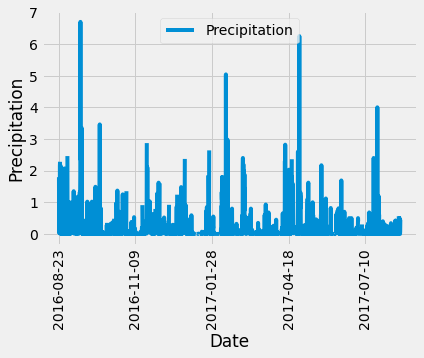

In [114]:
# Use Pandas Plotting with Matplotlib to plot the data

plot = prcp_df.plot(rot=90);
plot.set_ylabel("Precipitation")

plt.savefig("plot.png")


In [17]:
# Find the most recent date in the data set.
recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent)


('2017-08-23',)


In [81]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stats = prcp_df.describe()
stat_df = pd.DataFrame(summary_stats)
stat_df.rename(columns = {"prcp": "precipitation"})

Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000

# Exploratory Station Analysis

In [92]:
# Design a query to calculate the total number stations in the dataset

total_stations = session.query(func.count(station.id)).all()
total_stations

[(9)]

In [101]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_stations = session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [104]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [105]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
temp_observation = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').\
filter(measurement.date>=oneyr_ago).all()
temp_observation

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [107]:
# Temperature dataframe created
temperature_df = pd.DataFrame(temp_observation, columns=["tobs"])
temperature_df.head()

tobs
0  77.0
1  77.0
2  80.0
3  80.0
4  75.0

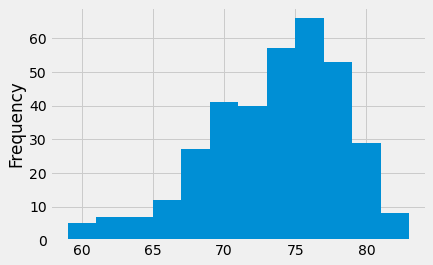

<Figure size 864x576 with 0 Axes>

In [112]:
# Plot the results as a histogram

plt.hist(temperature_df["tobs"], bins=12)
plt.ylabel("Frequency")
plt.figure(figsize=(12,8))

#Saved plot
plt.savefig("histogram.png")
plt.show()


# Close session

In [113]:
# Close Session
session.close()